In [309]:
# load in libraries
import pandas as pd
import os
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import ScalarFormatter
import geopandas as gpd
from shapely.geometry import Point


In [310]:
# Read in processed airports data
# Airports with aerial firefighting capabilities
airports_dir = os.path.join(os.getcwd(), '../data/processed_data/airports_processed.csv')
airports = pd.read_csv(airports_dir)

In [311]:
# view
airports.head()

ident iata_code icao_code local_code                       name  \
0   0R7       NaN       NaN        0R7      The Red River Airport   
1   5K2       NaN       NaN        5K2  Tribune Municipal Airport   
2   C56       NaN       NaN        C56                 Bult Field   
3   D38       IUA       NaN        IUA        Canandaigua Airport   
4   FWB       NaN       NaN        FWB       Branson West Airport   

            type  latitude_deg  longitude_deg  elevation_ft   country_name  \
0  small_airport     31.990700     -93.307404         177.0  United States   
1  small_airport     38.450901    -101.750135        3620.0  United States   
2  small_airport     41.377602     -87.681396         790.0  United States   
3  small_airport     42.908902     -77.325226         814.0  United States   
4  small_airport     36.698497     -93.402249        1348.0  United States   

  region_name  airtanker_base  
0   Louisiana           False  
1      Kansas           False  
2    Illinois           False  
3    New York           False  
4    Missouri           False

In [312]:
# get data info
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ident           1394 non-null   object 
 1   iata_code       1006 non-null   object 
 2   icao_code       965 non-null    object 
 3   local_code      1394 non-null   object 
 4   name            1394 non-null   object 
 5   type            1394 non-null   object 
 6   latitude_deg    1394 non-null   float64
 7   longitude_deg   1394 non-null   float64
 8   elevation_ft    1394 non-null   float64
 9   country_name    1394 non-null   object 
 10  region_name     1394 non-null   object 
 11  airtanker_base  1394 non-null   bool   
dtypes: bool(1), float64(3), object(8)
memory usage: 121.3+ KB


In [313]:
# Count null values in each column of the filtered dataset
null_counts = airports.isnull().sum()
# Print the result
print("Null values in each column:")
print(null_counts.sort_values(ascending=False))

Null values in each column:
icao_code         429
iata_code         388
ident               0
local_code          0
name                0
type                0
latitude_deg        0
longitude_deg       0
elevation_ft        0
country_name        0
region_name         0
airtanker_base      0
dtype: int64


In [314]:
# read in runway data
runways_dir = os.path.join(os.getcwd(), '../data/processed_data/runways_processed.csv')
runways = pd.read_csv(runways_dir)

In [315]:
# view
runways.head()

runway_id ident  runway_length    runway_surface
0          1   0R7         5000.0           asphalt
1          2   5K2         5000.0  grooved concrete
2          3   C56         5001.0  grooved concrete
3          4   D38         5500.0           asphalt
4          5   FWB         5000.0  grooved concrete

In [316]:
# get data info
runways.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   runway_id       1749 non-null   int64  
 1   ident           1749 non-null   object 
 2   runway_length   1749 non-null   float64
 3   runway_surface  1749 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 54.8+ KB


In [317]:
# Count null values in each column of the dataset
null_counts = runways.isnull().sum()
# Print the result
print("Null values in each column:")
print(null_counts.sort_values(ascending=False))

Null values in each column:
runway_id         0
ident             0
runway_length     0
runway_surface    0
dtype: int64


In [318]:
# Merge on 'ident', adding runway info to airports
airports_runways_joined = pd.merge(
    airports,
    runways[['ident', 'runway_length', 'runway_surface']],  # keep relevant columns
    on='ident',
    how='left'  # keep all airports, even if no runway info
)

# View result
print(airports_runways_joined.head())

  ident iata_code icao_code local_code                       name  \
0   0R7       NaN       NaN        0R7      The Red River Airport   
1   5K2       NaN       NaN        5K2  Tribune Municipal Airport   
2   C56       NaN       NaN        C56                 Bult Field   
3   D38       IUA       NaN        IUA        Canandaigua Airport   
4   FWB       NaN       NaN        FWB       Branson West Airport   

            type  latitude_deg  longitude_deg  elevation_ft   country_name  \
0  small_airport     31.990700     -93.307404         177.0  United States   
1  small_airport     38.450901    -101.750135        3620.0  United States   
2  small_airport     41.377602     -87.681396         790.0  United States   
3  small_airport     42.908902     -77.325226         814.0  United States   
4  small_airport     36.698497     -93.402249        1348.0  United States   

  region_name  airtanker_base  runway_length    runway_surface  
0   Louisiana           False         5000.0       

In [319]:
# compute the number of airports in the US actually have wildfire capabilities
# get all airports
airports_raw_dir = os.path.join(os.getcwd(), '../data/raw_data/our_airports_raw/airports.csv')
airports_raw = pd.read_csv(
    airports_raw_dir
)

# Filter all U.S. airports from raw dataset
us_airports = airports_raw[airports_raw['iso_country'] == 'US']
total_us_airports = len(us_airports)

# Get number of aerial firefighting airports (already filtered to US)
num_firefighting_airports = len(airports)

# Compute proportion
proportion = num_firefighting_airports / total_us_airports if total_us_airports > 0 else 0
percentage = proportion * 100

# Output fraction and percentage
print(f"Fraction of U.S. airports with aerial firefighting capabilities: "
      f"{num_firefighting_airports}/{total_us_airports}")

print(f"Percentage of U.S. airports with aerial firefighting capabilities: "
      f"{percentage:.2f}%")

Fraction of U.S. airports with aerial firefighting capabilities: 1394/32098
Percentage of U.S. airports with aerial firefighting capabilities: 4.34%


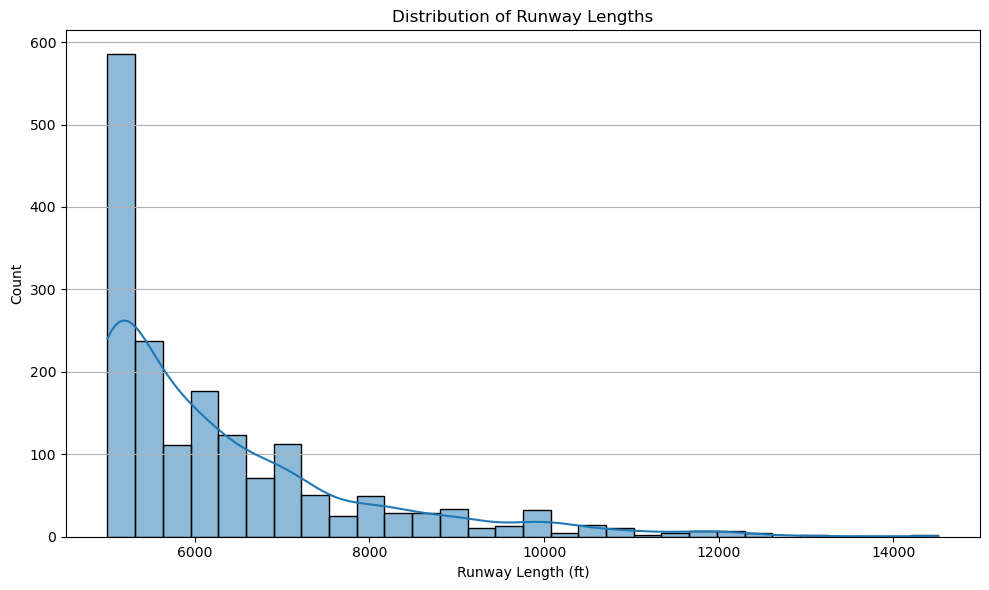

In [320]:
# Drop missing runway lengths and convert to float (if necessary)
runway_lengths_all = airports_runways_joined.dropna(subset=['runway_length']).copy()
runway_lengths_all['runway_length'] = runway_lengths_all['runway_length'].astype(float)

# Plot histogram
plt.figure(figsize=(10, 6))
ax = sns.histplot(runway_lengths_all['runway_length'], bins=30, kde=True)

plt.xlabel('Runway Length (ft)')
plt.title('Distribution of Runway Lengths')

# Grid styling
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

In [321]:
# Drop missing values and ensure correct dtype
runway_series = airports_runways_joined['runway_length'].dropna().astype(float)

# Compute stats
runway_stats = runway_series.describe()
iqr = runway_stats['75%'] - runway_stats['25%']
mode_val = runway_series.mode()

# Outlier thresholds
lower_bound = runway_stats['25%'] - 1.5 * iqr
upper_bound = runway_stats['75%'] + 1.5 * iqr

# Identify outliers
outliers = runway_series[(runway_series < lower_bound) | (runway_series > upper_bound)]

# Summary output
print("Runway Lengths Statistics (ft):")
print(f"Mode: {mode_val.iloc[0] if not mode_val.empty else 'No mode'}")
print(f"Mean: {runway_stats['mean']:.2f}")
print(f"Median: {runway_series.median():.2f}")
print(f"Std: {runway_stats['std']:.2f}")
print(f"IQR: {iqr:.2f}")
print(f"Min: {runway_stats['min']}")
print(f"Max: {runway_stats['max']}")

# Get the rows with the minimum and maximum runway lengths
min_runway_row = airports_runways_joined.loc[runway_series.idxmin()]
max_runway_row = airports_runways_joined.loc[runway_series.idxmax()]

print("\nAirport with the Shortest Runway:")
print(f"Name: {min_runway_row['name']}")
print(f"Runway Length: {min_runway_row['runway_length']} ft")

print("\nAirport with the Longest Runway:")
print(f"Name: {max_runway_row['name']}")
print(f"Runway Length: {max_runway_row['runway_length']} ft")

print(f"\nOutlier Thresholds: < {lower_bound:.2f} or > {upper_bound:.2f}")
print(f"Number of Outliers: {len(outliers)}")

# Optional: print extreme outliers
if not outliers.empty:
    print("\nSample Outliers:")
    print(outliers.sort_values().head(5))
    print(outliers.sort_values(ascending=False).head(5))


Runway Lengths Statistics (ft):
Mode: 5000.0
Mean: 6298.81
Median: 5800.00
Std: 1557.68
IQR: 1862.00
Min: 5000.0
Max: 14515.0

Airport with the Shortest Runway:
Name: The Red River Airport
Runway Length: 5000.0 ft

Airport with the Longest Runway:
Name: Harry Reid International Airport
Runway Length: 14515.0 ft

Outlier Thresholds: < 2307.00 or > 9755.00
Number of Outliers: 92

Sample Outliers:
301      9763.0
930      9771.0
1748     9800.0
1391     9999.0
128     10000.0
Name: runway_length, dtype: float64
932     14515.0
893     14511.0
118     13793.0
489     13125.0
1079    13000.0
Name: runway_length, dtype: float64


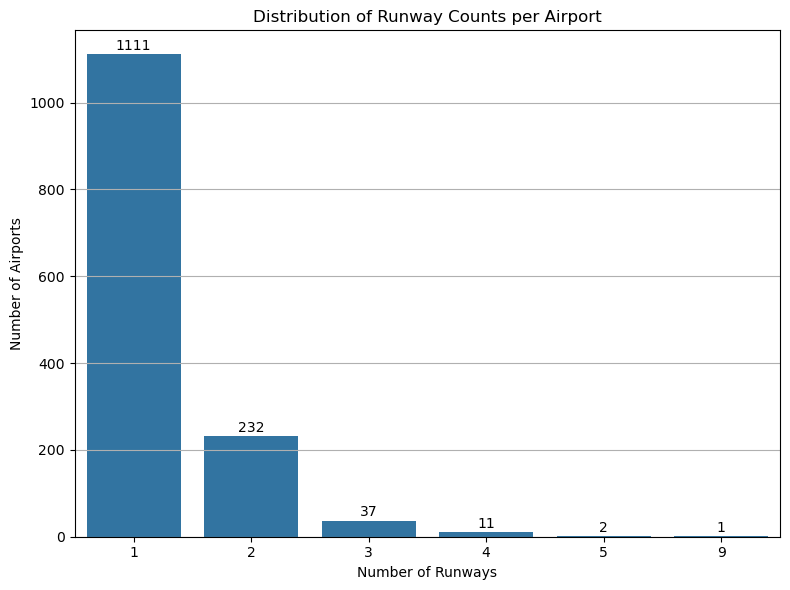

In [322]:
# 1. Count number of runways per airport
runway_counts = runways.groupby('ident').size().reset_index(name='num_runways')

# 2. Merge with airports to attach count
airports_with_runway_counts = pd.merge(
    airports,
    runway_counts,
    on='ident',
    how='left'
)

# Fill NaNs (airports with no runway data)
airports_with_runway_counts['num_runways'] = airports_with_runway_counts['num_runways'].fillna(0).astype(int)

# 3. Plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='num_runways', data=airports_with_runway_counts)

plt.xlabel('Number of Runways')
plt.ylabel('Number of Airports')
plt.title('Distribution of Runway Counts per Airport')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Add count labels above bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 10, str(count), ha='center')

plt.tight_layout()
plt.show()



In [323]:
# Descriptive Stats for number of runways per airport
runway_count_stats = airports_with_runway_counts['num_runways'].describe()
iqr_runways = runway_count_stats['75%'] - runway_count_stats['25%']

print("\nNumber of Runways per Airport Statistics:")
print(f"Mode: {airports_with_runway_counts['num_runways'].mode()[0]}")
print(f"Mean: {runway_count_stats['mean']:.2f}")
print(f"Median: {airports_with_runway_counts['num_runways'].median()}")
print(f"Std Dev: {runway_count_stats['std']:.2f}")
print(f"IQR: {iqr_runways}")
print(f"Min: {runway_count_stats['min']}")
print(f"Max: {runway_count_stats['max']}")

# Optional: frequency table
print("\nRunway Count Frequencies:")
print(airports_with_runway_counts['num_runways'].value_counts().sort_index())




Number of Runways per Airport Statistics:
Mode: 1
Mean: 1.25
Median: 1.0
Std Dev: 0.59
IQR: 0.0
Min: 1.0
Max: 9.0

Runway Count Frequencies:
num_runways
1    1111
2     232
3      37
4      11
5       2
9       1
Name: count, dtype: int64


In [324]:
# Find the min and max number of runways
min_runways = airports_with_runway_counts['num_runways'].min()
max_runways = airports_with_runway_counts['num_runways'].max()

# Filter airports with min and max number of runways
airports_with_min_runways = airports_with_runway_counts[airports_with_runway_counts['num_runways'] == min_runways]
airports_with_max_runways = airports_with_runway_counts[airports_with_runway_counts['num_runways'] == max_runways]

# Output results
print(f"\nAirports with the Fewest Runways ({min_runways} runway):")
print(airports_with_min_runways[['name', 'ident', 'num_runways']])

print(f"\nAirports with the Most Runways ({max_runways} runways):")
print(airports_with_max_runways[['name', 'ident', 'num_runways']])



Airports with the Fewest Runways (1 runway):
                                                   name ident  num_runways
0                                 The Red River Airport   0R7            1
1                             Tribune Municipal Airport   5K2            1
2                                            Bult Field   C56            1
3                                   Canandaigua Airport   D38            1
4                                  Branson West Airport   FWB            1
...                                                 ...   ...          ...
1385                              Wheeler Army Airfield  PHHI            1
1387  Ellison Onizuka Kona International Airport at ...  PHKO            1
1389                              Waimea Kohala Airport  PHMU            1
1391                                      Lanai Airport  PHNY            1
1392                      Kahului International Airport  PHOG            1

[1111 rows x 3 columns]

Airports with the Most Runwa

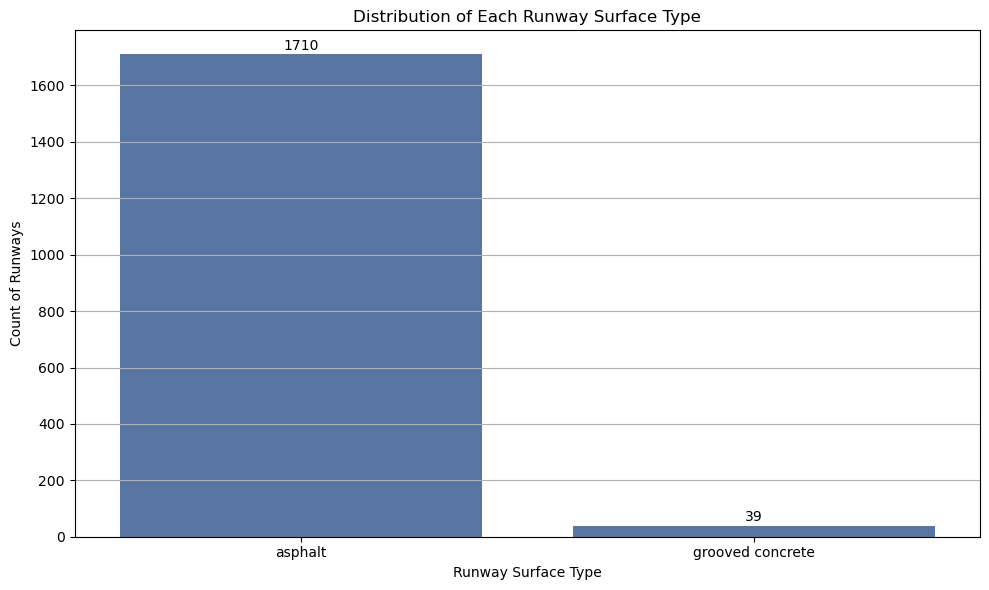

In [325]:
# Use original runways dataset
runway_surfaces_clean = runways['runway_surface'].dropna().str.strip()

# Count each surface type
surface_counts = runway_surfaces_clean.value_counts().sort_values(ascending=False)

# Plot
default_blue = sns.color_palette("deep")[0]
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=surface_counts.index, y=surface_counts.values, color=default_blue)

plt.xlabel('Runway Surface Type')
plt.ylabel('Count of Runways')
plt.title('Distribution of Each Runway Surface Type')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Add count labels
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + max(surface_counts.values)*0.01, str(count), ha='center')

plt.tight_layout()
plt.show()



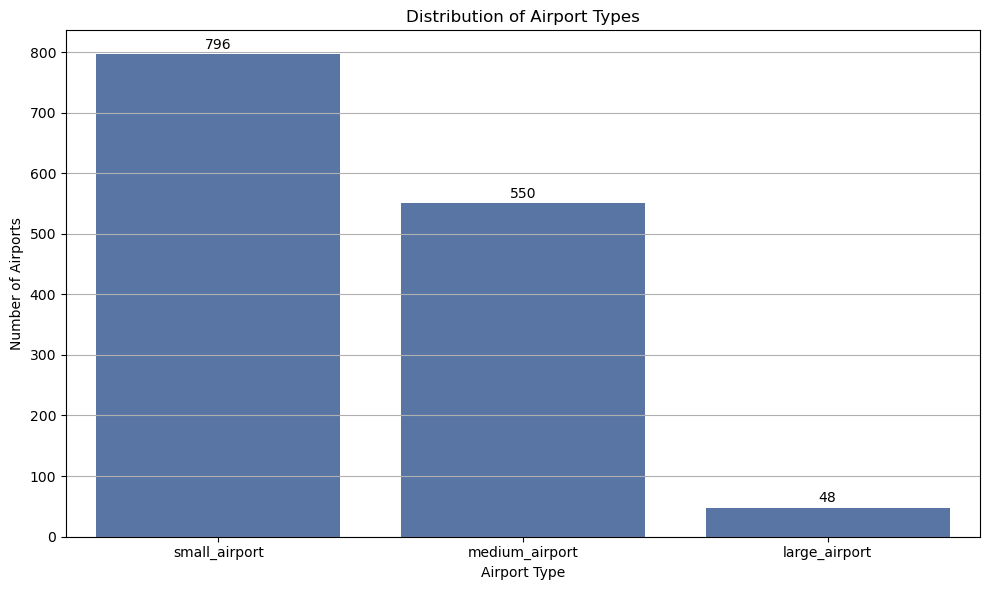

In [326]:
# airport type plot

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=airports, x='type', color=sns.color_palette("deep")[0])

plt.xlabel('Airport Type')
plt.ylabel('Number of Airports')
plt.title('Distribution of Airport Types')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Add count labels on top of bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + max(ax.get_ylim())*0.01, str(count), ha='center')

plt.tight_layout()
plt.show()


In [327]:
# Filter for closed airports
closed_airports = airports[airports['type'].str.lower() == 'closed']

# Output the closed airports (name and identifier for clarity)
print(f"Number of Closed Airports: {len(closed_airports)}")
print("\nClosed Airports:")
print(closed_airports[['name', 'ident', 'type']])

Number of Closed Airports: 0

Closed Airports:
Empty DataFrame
Columns: [name, ident, type]
Index: []


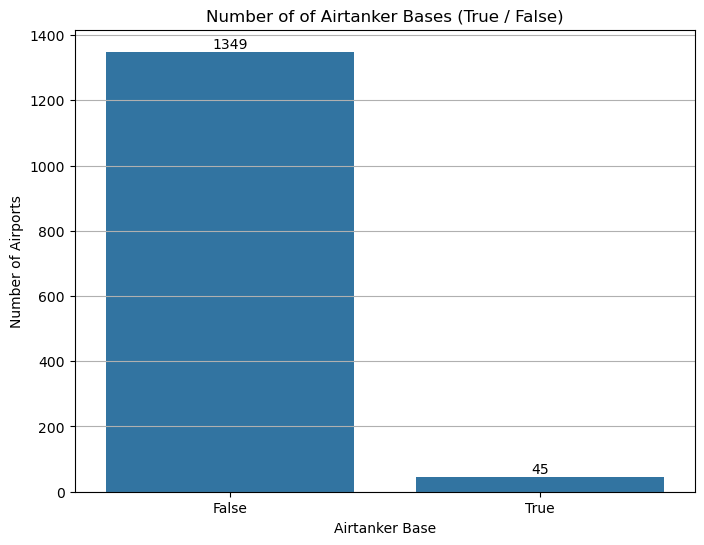

In [328]:
# create plot of number of airtanker bases
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='airtanker_base', data=airports)

plt.xlabel('Airtanker Base')
plt.ylabel('Number of Airports')
plt.title('Number of of Airtanker Bases (True / False)')

# Show only horizontal grid lines
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# Add count labels above bars
for p in ax.patches:
    count = int(p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y + 10, str(count), ha='center')

plt.show()

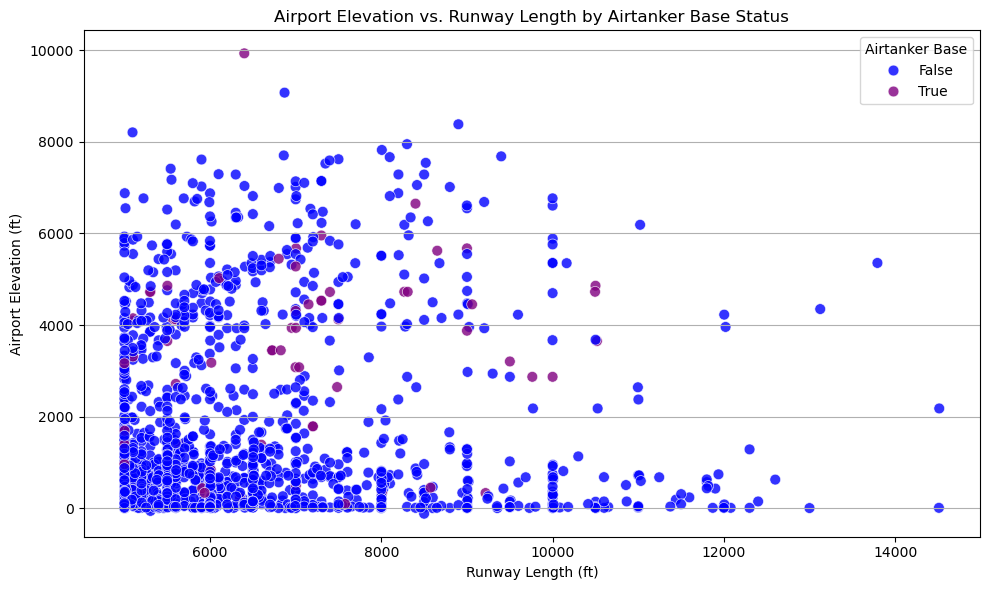

In [329]:
# Make sure elevation and runway_length are numeric
airports_runways_joined['elevation_ft'] = pd.to_numeric(airports_runways_joined['elevation_ft'], errors='coerce')
airports_runways_joined['runway_length'] = pd.to_numeric(airports_runways_joined['runway_length'], errors='coerce')

# Drop rows with missing elevation or runway_length
df_plot = airports_runways_joined.dropna(subset=['elevation_ft', 'runway_length'])

# Plot: runway length vs elevation, colored by airtanker_base
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df_plot,
    x='runway_length',
    y='elevation_ft',
    hue='airtanker_base',
    palette={False: 'blue', True: 'purple'},
    alpha=0.8,
    s=60,
    edgecolor='w',
    linewidth=0.5
)

plt.xlabel('Runway Length (ft)')
plt.ylabel('Airport Elevation (ft)')
plt.title('Airport Elevation vs. Runway Length by Airtanker Base Status')

ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.legend(title='Airtanker Base', loc='best')
plt.tight_layout()
plt.show()


In [330]:
# Use only rows with valid lat/lon
locations = airports.dropna(subset=['latitude_deg', 'longitude_deg'])

# Columns for popup display
columns = airports.columns.tolist()

# Center of the US roughly
m = folium.Map(location=[39.5, -98.35], zoom_start=4)

for _, row in locations.iterrows():
    # Prepare popup content
    popup_html = "<br>".join(
        f"<b>{col}:</b> {row[col]}" for col in columns if pd.notnull(row[col])
    )
    
    # Determine marker color: purple for airtanker base, else blue
    if 'airtanker_base' in row and bool(row['airtanker_base']):
        color = 'purple'
    else:
        color = 'blue'
    
    folium.CircleMarker(
        location=[row['latitude_deg'], row['longitude_deg']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=folium.Popup(popup_html, max_width=300),
        tooltip=row.get('name', 'Airport')
    ).add_to(m)

# Save map to file
m.save('interactive_airport_map.html')

In [331]:
# display
m

In [332]:
# read in airport distances dataset
airport_distances = pd.read_csv('../data/processed_data/nearest_airports_to_fires.csv')

In [333]:
# view
airport_distances.head()

FIRE ID   FIRE LAT   FIRE LON                 CLOSEST_AIRPORT_NAME  \
0  2020_19418  39.949755 -93.231101  Midwest National Air Center Airport   
1  2020_19429  39.749156 -97.388993             Salina Municipal Airport   
2  2020_19427  39.750497 -96.711432     Philip Billard Municipal Airport   
3  2020_19431  39.733650 -97.399680             Salina Municipal Airport   
4  2020_19434  39.715525 -97.394927             Salina Municipal Airport   

  AIRPORT IDENT RUNWAY LENGTH  AIRTANKER BASE REGION NAME    AIRPORT TYPE  \
0          KGPH          5504           False    Missouri   small_airport   
1          KSLN    6510,12300           False      Kansas  medium_airport   
2          KTOP          5099           False      Kansas  medium_airport   
3          KSLN    6510,12300           False      Kansas  medium_airport   
4          KSLN    6510,12300           False      Kansas  medium_airport   

   AIRPORT LAT  AIRPORT LON       DISTANCE  
0    39.332500   -94.309601  115059.314201  
1    38.791000   -97.652199  108924.489030  
2    39.069899   -95.622606  120320.938839  
3    38.791000   -97.652199  107048.558942  
4    38.791000   -97.652199  105161.951419

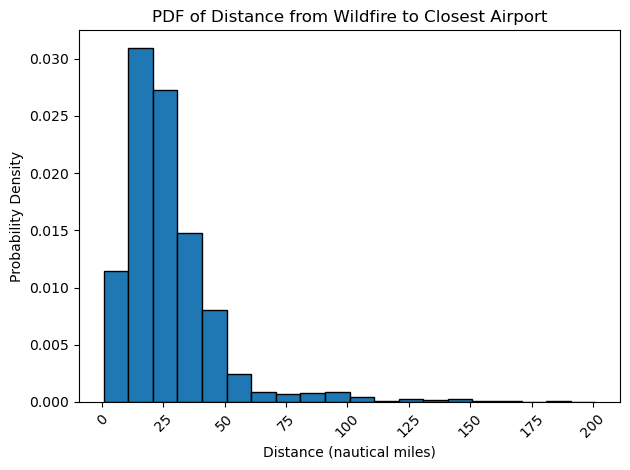

In [334]:
# --- Histogram for Closest Airports ---

fig, ax = plt.subplots()

# Convert distance to nautical miles
airport_distances['DISTANCE_NM'] = airport_distances['DISTANCE'] / 1852

# Plot histogram
ax.hist(airport_distances['DISTANCE_NM'], bins=20, density=True, edgecolor='black')

# Titles and labels
ax.set_title('PDF of Distance from Wildfire to Closest Airport')
ax.set_xlabel('Distance (nautical miles)')
ax.set_ylabel('Probability Density')

# Format x-axis
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

# Rotate x-axis ticks
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [335]:
# read in airtanker bases distances dataset
airtanker_bases_distances = pd.read_csv('../data/processed_data/nearest_airtanker_bases_to_fires.csv')

In [336]:
# view
airtanker_bases_distances.head()

FIRE ID   FIRE LAT   FIRE LON      CLOSEST_AIRTANKER_BASE_NAME  \
0  2020_19418  39.949755 -93.231101  Brainerd Lakes Regional Airport   
1  2020_19429  39.749156 -97.388993          Pueblo Memorial Airport   
2  2020_19427  39.750497 -96.711432          Pueblo Memorial Airport   
3  2020_19431  39.733650 -97.399680          Pueblo Memorial Airport   
4  2020_19434  39.715525 -97.394927          Pueblo Memorial Airport   

  AIRPORT IDENT  RUNWAY LENGTH REGION NAME    AIRPORT TYPE  AIRPORT LAT  \
0          KBRD   6.500650e+07   Minnesota  medium_airport    46.402861   
1          KPUB   8.268831e+12    Colorado  medium_airport    38.289101   
2          KPUB   8.268831e+12    Colorado  medium_airport    38.289101   
3          KPUB   8.268831e+12    Colorado  medium_airport    38.289101   
4          KPUB   8.268831e+12    Colorado  medium_airport    38.289101   

   AIRPORT LON  DISTANCE_TO_AIRTANKER_BASE  
0   -94.129727               721228.872223  
1  -104.497002               634970.585251  
2  -104.497002               691698.675209  
3  -104.497002               633705.600126  
4  -104.497002               633672.348418

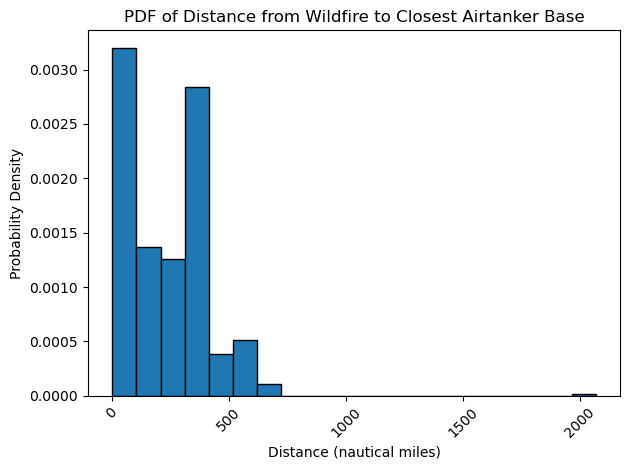

In [337]:
# --- Histogram for Closest Airtanker Bases ---

fig, ax = plt.subplots()

# Convert distance to nautical miles
airtanker_bases_distances['DISTANCE_NM'] = airtanker_bases_distances['DISTANCE_TO_AIRTANKER_BASE'] / 1852

# Plot histogram
ax.hist(airtanker_bases_distances['DISTANCE_NM'], bins=20, density=True, edgecolor='black')

# Titles and labels
ax.set_title('PDF of Distance from Wildfire to Closest Airtanker Base')
ax.set_xlabel('Distance (nautical miles)')
ax.set_ylabel('Probability Density')

# Format x-axis
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

# Rotate x-axis ticks
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

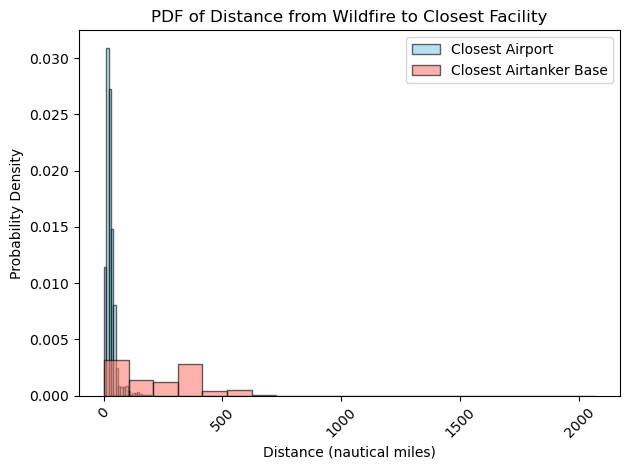

In [338]:
# Convert distances to nautical miles if not already
airtanker_bases_distances['DISTANCE_NM'] = airtanker_bases_distances['DISTANCE_TO_AIRTANKER_BASE'] / 1852

# Create overlay plot
fig, ax = plt.subplots()

# Plot histogram for closest airports
ax.hist(airport_distances['DISTANCE_NM'], bins=20, density=True, edgecolor='black',
        alpha=0.6, label='Closest Airport', color='skyblue')

# Plot histogram for closest airtanker bases
ax.hist(airtanker_bases_distances['DISTANCE_NM'], bins=20, density=True, edgecolor='black',
        alpha=0.6, label='Closest Airtanker Base', color='salmon')

# Titles and labels
ax.set_title('PDF of Distance from Wildfire to Closest Facility')
ax.set_xlabel('Distance (nautical miles)')
ax.set_ylabel('Probability Density')

# Format x-axis with whole numbers and no scientific notation
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)

# Rotate x-axis ticks
plt.xticks(rotation=45)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()

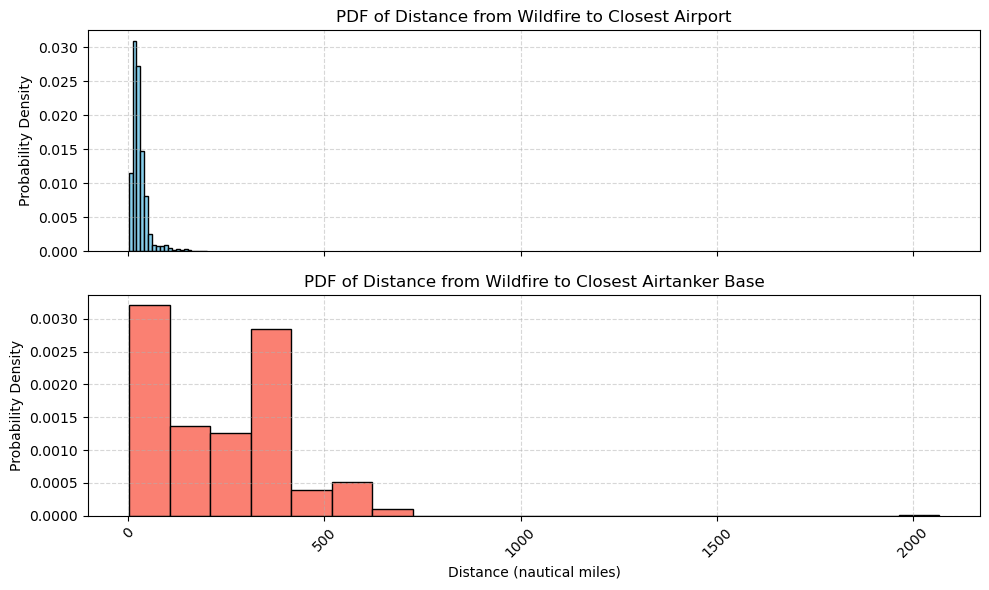

In [339]:
# Convert to nautical miles if not already

# Setup shared x-axis facet plot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

# Histogram: Closest Airport
ax1.hist(airport_distances['DISTANCE_NM'], bins=20, density=True, edgecolor='black', color='skyblue')
ax1.set_title('PDF of Distance from Wildfire to Closest Airport')
ax1.set_ylabel('Probability Density')
ax1.grid(True, linestyle='--', alpha=0.5)

# Histogram: Closest Airtanker Base
ax2.hist(airtanker_bases_distances['DISTANCE_NM'], bins=20, density=True, edgecolor='black', color='salmon')
ax2.set_title('PDF of Distance from Wildfire to Closest Airtanker Base')
ax2.set_xlabel('Distance (nautical miles)')
ax2.set_ylabel('Probability Density')
ax2.grid(True, linestyle='--', alpha=0.5)

# Format x-axis: no scientific notation, rotate labels
formatter = ScalarFormatter(useOffset=False)
formatter.set_scientific(False)
ax2.xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [340]:
# 1. Load the GACC shapefile
gacc_gdf = gpd.read_file('../data/raw_data/gacc_boundaries/National_GACC_Final_20250113.shp')

In [341]:
# Optional: Rename for consistency
gacc_gdf = gacc_gdf.rename(columns={'GACCName': 'GACC_NAME'})

In [342]:
# 2. Create GeoDataFrame from airport/fire locations with Points
# Make sure longitude and latitude columns exist and are numeric
airport_distances = airport_distances.copy()
airport_distances['FIRE LON'] = pd.to_numeric(airport_distances['FIRE LON'], errors='coerce')
airport_distances['FIRE LAT'] = pd.to_numeric(airport_distances['FIRE LAT'], errors='coerce')
airport_distances = airport_distances.dropna(subset=['FIRE LON', 'FIRE LAT'])
geometry = [Point(xy) for xy in zip(airport_distances['FIRE LON'], airport_distances['FIRE LAT'])]
airports_gdf = gpd.GeoDataFrame(airport_distances, geometry=geometry)

In [343]:
# 3. Ensure CRS match (reproject if needed)
if airports_gdf.crs != gacc_gdf.crs:
    airports_gdf = airports_gdf.set_crs("EPSG:4326")  # Assuming WGS84 if unknown
    airports_gdf = airports_gdf.to_crs(gacc_gdf.crs)

In [344]:
# 4. Spatial join: Assign each airport/fire to a GACC based on its location
airport_with_gacc = gpd.sjoin(
    airports_gdf,
    gacc_gdf[['geometry', 'GACC_NAME']],
    how='left',
    predicate='within'
)

In [345]:
# Coordinates roughly for Hawaii (latitude between ~18 and 23, longitude between ~-161 and -154)
hawaii_mask = (
    (airport_with_gacc['FIRE LAT'] >= 18) & (airport_with_gacc['FIRE LAT'] <= 23) &
    (airport_with_gacc['FIRE LON'] >= -161) & (airport_with_gacc['FIRE LON'] <= -154)
)

airport_with_gacc.loc[hawaii_mask, 'GACC_NAME'] = 'Hawaii Coordination Center'

In [346]:
# 5. Extract unique GACC regions present after join (excluding NaNs)
gacc_regions = airport_with_gacc['GACC_NAME'].dropna().unique()
n_regions = len(gacc_regions)

print(f"Number of unique GACC regions found: {n_regions}")
print("Regions:", gacc_regions)

Number of unique GACC regions found: 11
Regions: ['Eastern Area Coordination Center'
 'Rocky Mountain Area Coordination Center'
 'Southern Area Coordination Center'
 'Northwest Interagency Coordination Center'
 'Northern California Geographic Area Coordination Center'
 'Great Basin Coordination Center' 'Southwest Area Coordination Center'
 'Northern Rockies Coordination Center'
 'Southern California Coordination Center'
 'Alaska Interagency Coordination Center' 'Hawaii Coordination Center']


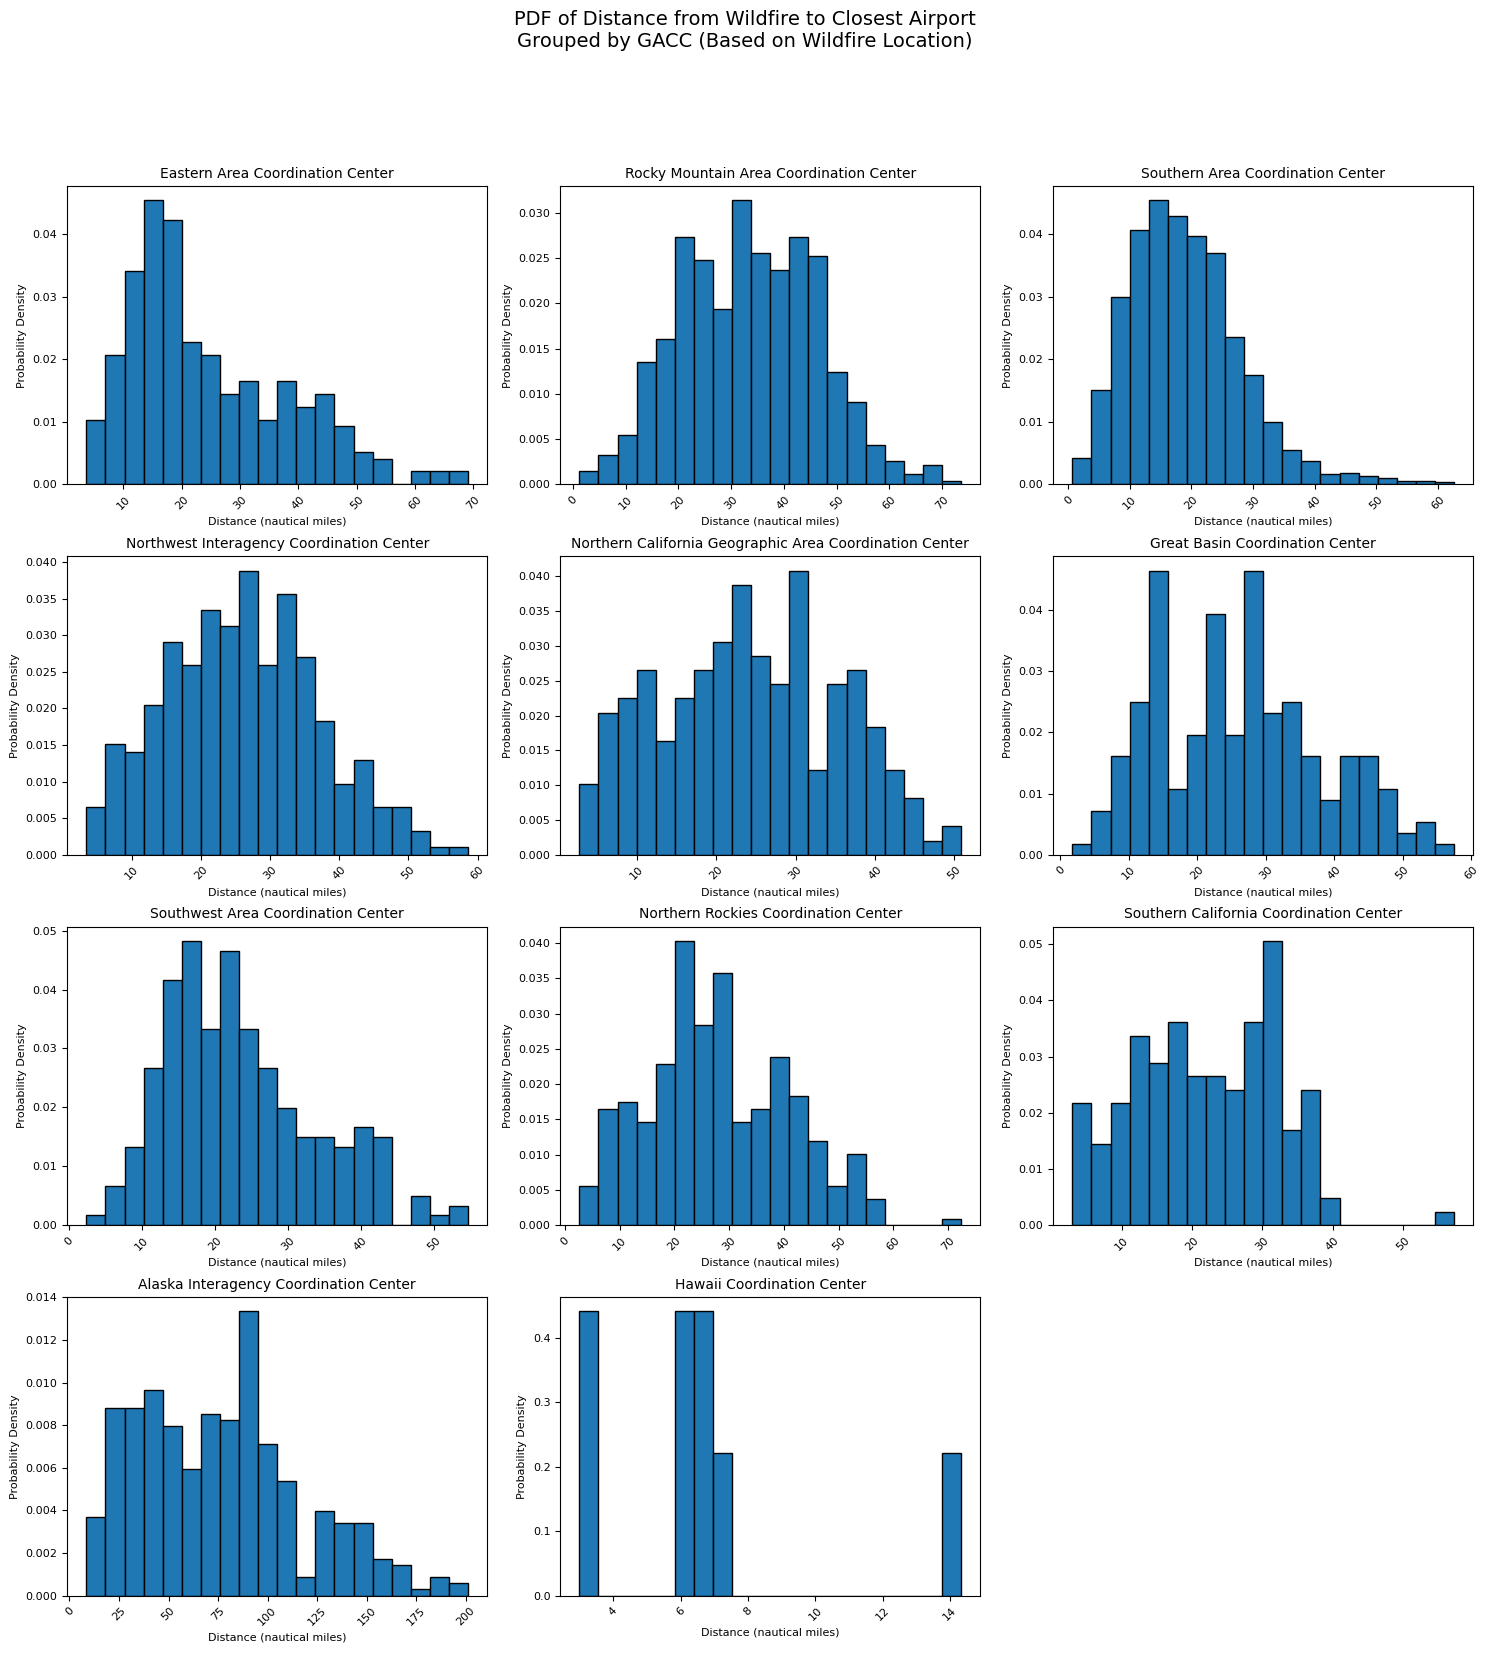

In [347]:
# Create facet plots (independent axes per subplot)
ncols = 3
nrows = int(np.ceil(n_regions / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))  # <-- removed sharex, sharey
axes = axes.flatten()
bins = 20

for i, region in enumerate(gacc_regions):
    ax = axes[i]
    data = airport_with_gacc.loc[airport_with_gacc['GACC_NAME'] == region, 'DISTANCE_NM'].dropna()
    
    ax.hist(data, bins=bins, density=True, edgecolor='black')
    ax.set_title(region, fontsize=10)
    ax.set_xlabel('Distance (nautical miles)', fontsize=8)
    ax.set_ylabel('Probability Density', fontsize=8)
    
    formatter = ScalarFormatter(useOffset=False)
    formatter.set_scientific(False)
    ax.xaxis.set_major_formatter(formatter)
    
    ax.tick_params(axis='both', labelsize=8)
    plt.setp(ax.get_xticklabels(), rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout
plt.tight_layout()
fig.suptitle('PDF of Distance from Wildfire to Closest Airport\nGrouped by GACC (Based on Wildfire Location)', y=1.03, fontsize=14)
plt.subplots_adjust(top=0.92)
plt.show()

In [348]:
# 2. Create GeoDataFrame from airport/fire locations with Points
# Make sure longitude and latitude columns exist and are numeric
airtanker_bases_distances = airtanker_bases_distances.copy()
airtanker_bases_distances['FIRE LON'] = pd.to_numeric(airtanker_bases_distances['FIRE LON'], errors='coerce')
airtanker_bases_distances['FIRE LAT'] = pd.to_numeric(airtanker_bases_distances['FIRE LAT'], errors='coerce')
airtanker_bases_distances = airtanker_bases_distances.dropna(subset=['FIRE LON', 'FIRE LAT'])
geometry = [Point(xy) for xy in zip(airtanker_bases_distances['FIRE LON'], airtanker_bases_distances['FIRE LAT'])]
airtanker_bases_gdf = gpd.GeoDataFrame(airtanker_bases_distances, geometry=geometry)

In [349]:
# 3. Ensure CRS match (reproject if needed)
if airtanker_bases_gdf.crs != gacc_gdf.crs:
    airtanker_bases_gdf = airtanker_bases_gdf.set_crs("EPSG:4326")  # Assuming WGS84 if unknown
    airtanker_bases_gdf = airtanker_bases_gdf.to_crs(gacc_gdf.crs)

In [350]:
# 4. Spatial join: Assign each airtanker bases/fire to a GACC based on its location
airtanker_bases_with_gacc = gpd.sjoin(
    airtanker_bases_gdf,
    gacc_gdf[['geometry', 'GACC_NAME']],
    how='left',
    predicate='within'
)

In [351]:
# Coordinates roughly for Hawaii (latitude between ~18 and 23, longitude between ~-161 and -154)
hawaii_mask = (
    (airtanker_bases_with_gacc['FIRE LAT'] >= 18) & (airtanker_bases_with_gacc['FIRE LAT'] <= 23) &
    (airtanker_bases_with_gacc['FIRE LON'] >= -161) & (airtanker_bases_with_gacc['FIRE LON'] <= -154)
)

airtanker_bases_with_gacc.loc[hawaii_mask, 'GACC_NAME'] = 'Hawaii Coordination Center'

In [352]:
# 5. Extract unique GACC regions present after join (excluding NaNs)
gacc_regions = airtanker_bases_with_gacc['GACC_NAME'].dropna().unique()
n_regions = len(gacc_regions)

print(f"Number of unique GACC regions found: {n_regions}")
print("Regions:", gacc_regions)

Number of unique GACC regions found: 11
Regions: ['Eastern Area Coordination Center'
 'Rocky Mountain Area Coordination Center'
 'Southern Area Coordination Center'
 'Northwest Interagency Coordination Center'
 'Northern California Geographic Area Coordination Center'
 'Great Basin Coordination Center' 'Southwest Area Coordination Center'
 'Northern Rockies Coordination Center'
 'Southern California Coordination Center'
 'Alaska Interagency Coordination Center' 'Hawaii Coordination Center']


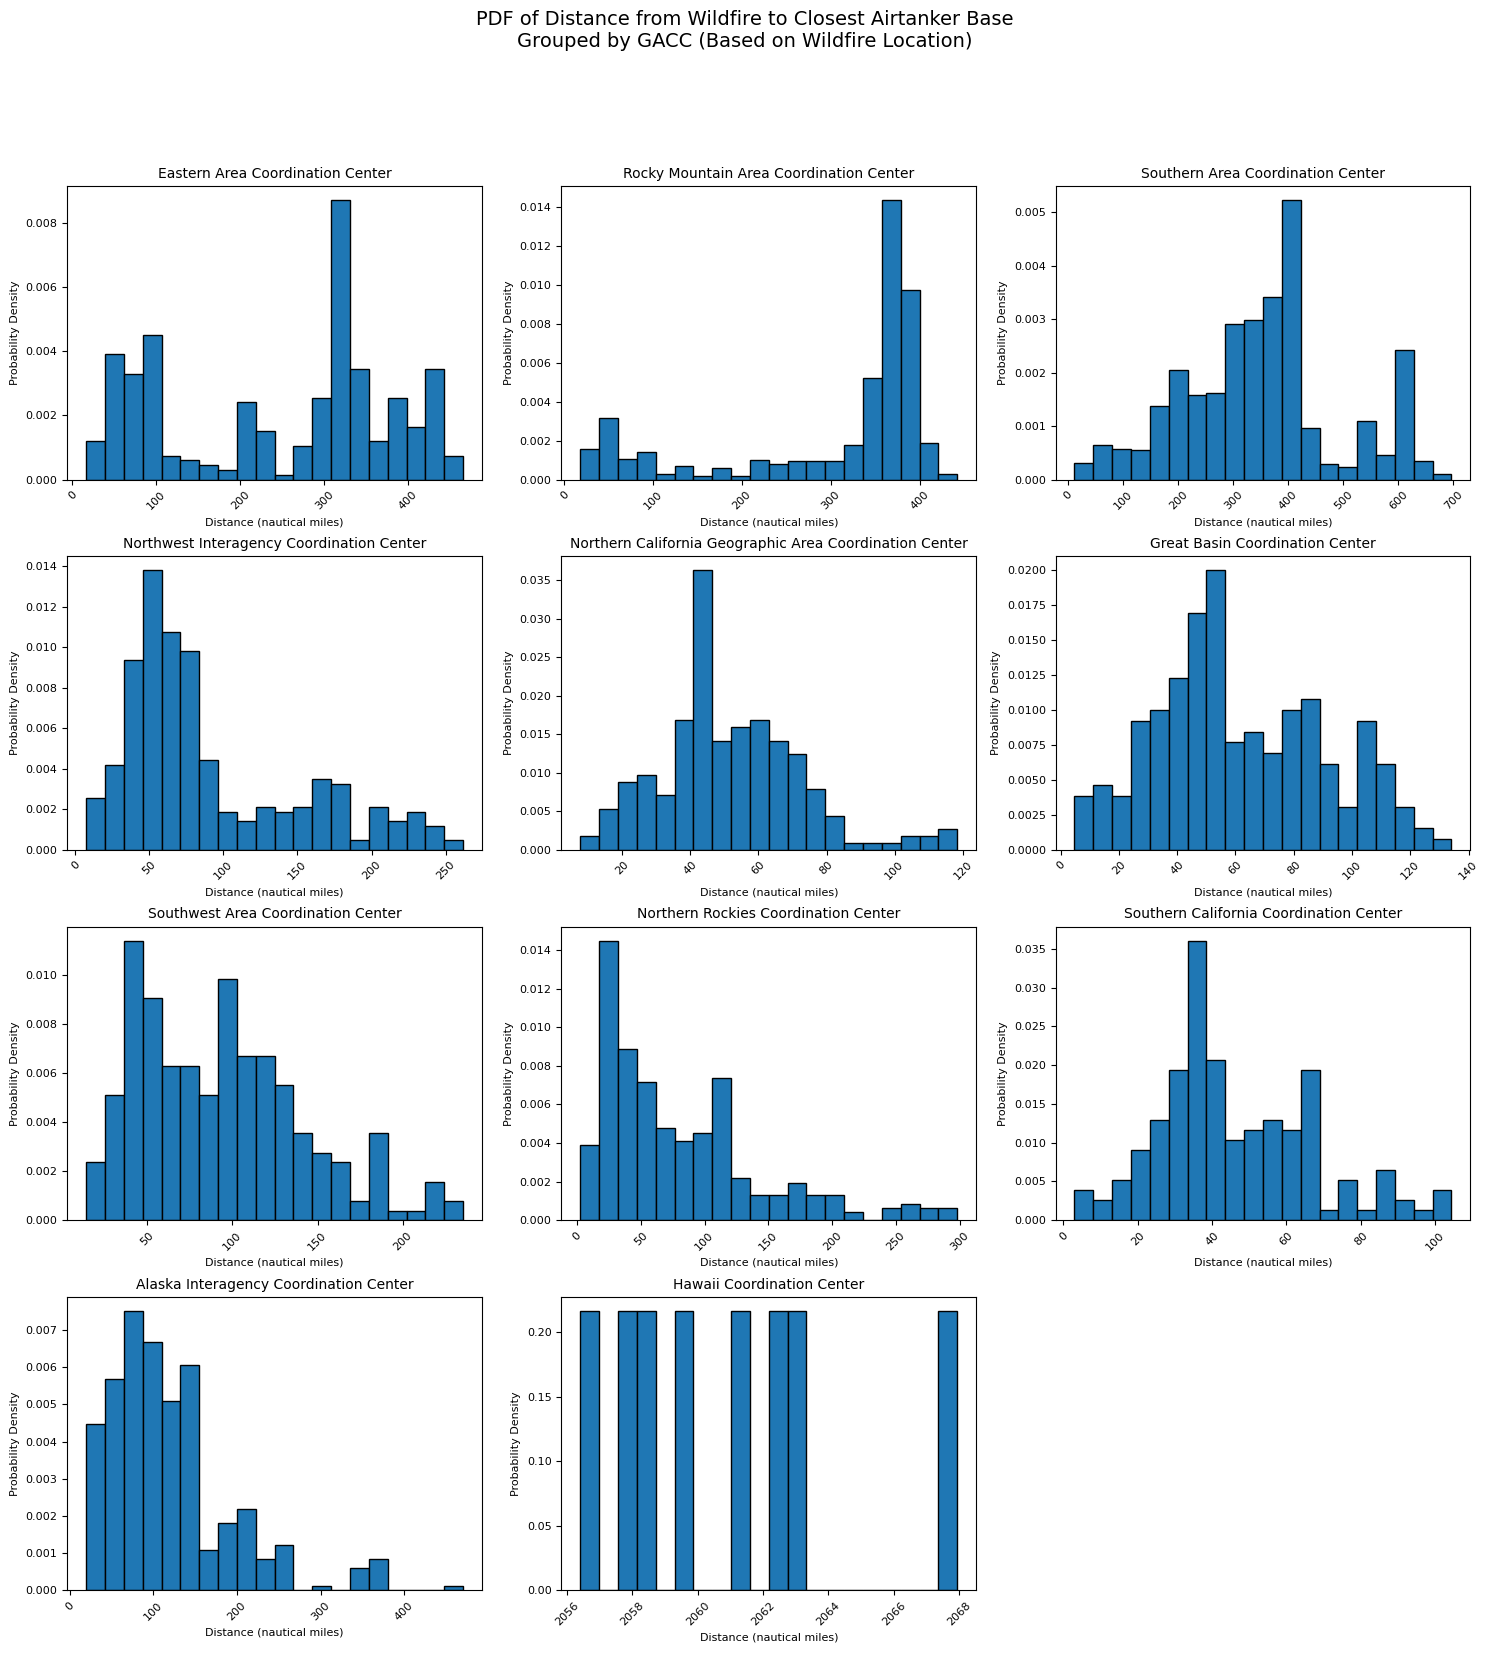

In [353]:
# Create facet plots (independent axes per subplot)
ncols = 3
nrows = int(np.ceil(n_regions / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))  # <-- removed sharex, sharey
axes = axes.flatten()
bins = 20

for i, region in enumerate(gacc_regions):
    ax = axes[i]
    data = airtanker_bases_with_gacc.loc[airtanker_bases_with_gacc['GACC_NAME'] == region, 'DISTANCE_NM'].dropna()
    
    ax.hist(data, bins=bins, density=True, edgecolor='black')
    ax.set_title(region, fontsize=10)
    ax.set_xlabel('Distance (nautical miles)', fontsize=8)
    ax.set_ylabel('Probability Density', fontsize=8)
    
    formatter = ScalarFormatter(useOffset=False)
    formatter.set_scientific(False)
    ax.xaxis.set_major_formatter(formatter)
    
    ax.tick_params(axis='both', labelsize=8)
    plt.setp(ax.get_xticklabels(), rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Final layout
plt.tight_layout()
fig.suptitle('PDF of Distance from Wildfire to Closest Airtanker Base\nGrouped by GACC (Based on Wildfire Location)', y=1.03, fontsize=14)
plt.subplots_adjust(top=0.92)
plt.show()